# Titanic - Machine Learning from Disasters
## Kaggle Competition

#### RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line.

### In this exercise, we will try to predict whether a passenger on the Titanic would have survived or not.

### Import the necessary libraries

In [1]:

# Import our libraries
import pandas as pd
import numpy as np

# Import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score

# Import the Naive Bayes, logistic regression, Bagging, RandomForest, AdaBoost, GradientBoost, Decision Trees and SVM Classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib import style
#plt.style.use('bmh')
#plt.style.use('ggplot')
plt.style.use('seaborn-notebook')

from matplotlib.ticker import StrMethodFormatter

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer


/tmp/ipykernel_11801/44292724.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')


### Read the training and testing data

In [2]:
#titanic_features = pd.read_csv('train.csv')
test_df = pd.read_csv("Dataset/test.csv")
train_df = pd.read_csv("Dataset/train.csv")

### Exploratory Analysis

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.shape

(891, 12)

In [5]:
test_df.shape

(418, 11)

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Features:
* `survival`: Survival 
* `PassengerId`: Unique Id of a passenger
* `pclass`: Ticket class     
* `sex`: Sex     
* `Age`: Age in years     
* `sibsp`: # of siblings / spouses aboard the Titanic     
* `parch`: # of parents / children aboard the Titanic     
* `ticket`: Ticket number     
* `fare`: Passenger fare     
* `cabin`: Cabin number     
* `embarked`: Port of Embarkation

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### From the table above, we can note a few things:
* ##### We have a few categorical variabes that need to be either converted to numerical or one-hot encoded, so that the machine learning algorithms can process them. 
* ##### The features have widely different ranges, and we will need to convert into roughly the same scale. 
* ##### Some features contain missing values (NaN = not a number), that we need to deal with.

### Missing data 

`Age` and `Embarked`

In [9]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


##### The `Embarked` feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the `Age` feature, which has 177 missing values. The `Cabin` feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [10]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#### Suppress warnings from output

In [11]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

### Q1: How many people Embarked from different ports? Is there a correlation between port of embarkment and survival? 

In [12]:
train_df['Embarked'].value_counts()/len(train_df)

Embarked
S    0.722783
C    0.188552
Q    0.086420
Name: count, dtype: float64

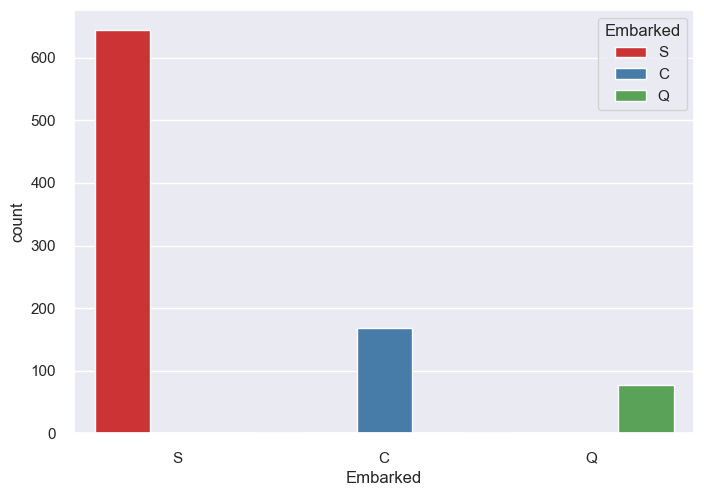

In [13]:
sns.set(style="darkgrid")
sns.countplot( x='Embarked', data=train_df, hue="Embarked", palette="Set1");

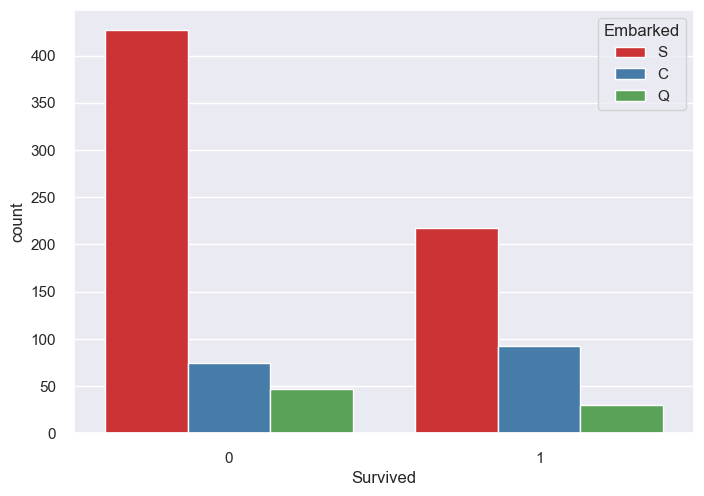

In [14]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=train_df, hue="Embarked", palette="Set1");

In [28]:
tf=train_df.groupby('Embarked').mean('Embarked')
tf

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


### Q2: Does survival depend upon gender?

In [31]:
train_df.groupby('Sex').mean('Sex')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


/home/sajid/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


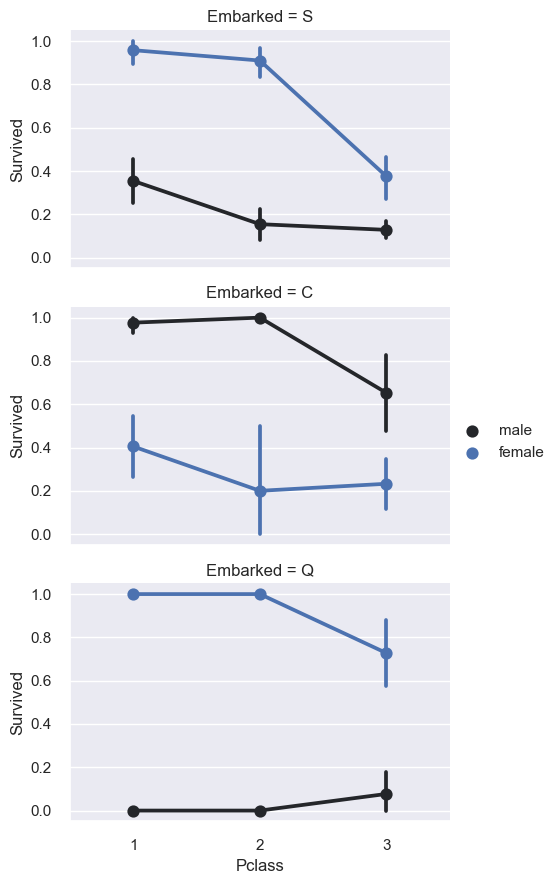

In [33]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked',  aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None )
FacetGrid.add_legend();

* ##### Embarked seems to be correlated with survival, depending on the gender.

* ##### Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

* ##### Pclass also seems to be correlated with survival. We will generate another plot of it below.

/tmp/ipykernel_11801/232030325.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
/tmp/ipykernel_11801/232030325.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[wome

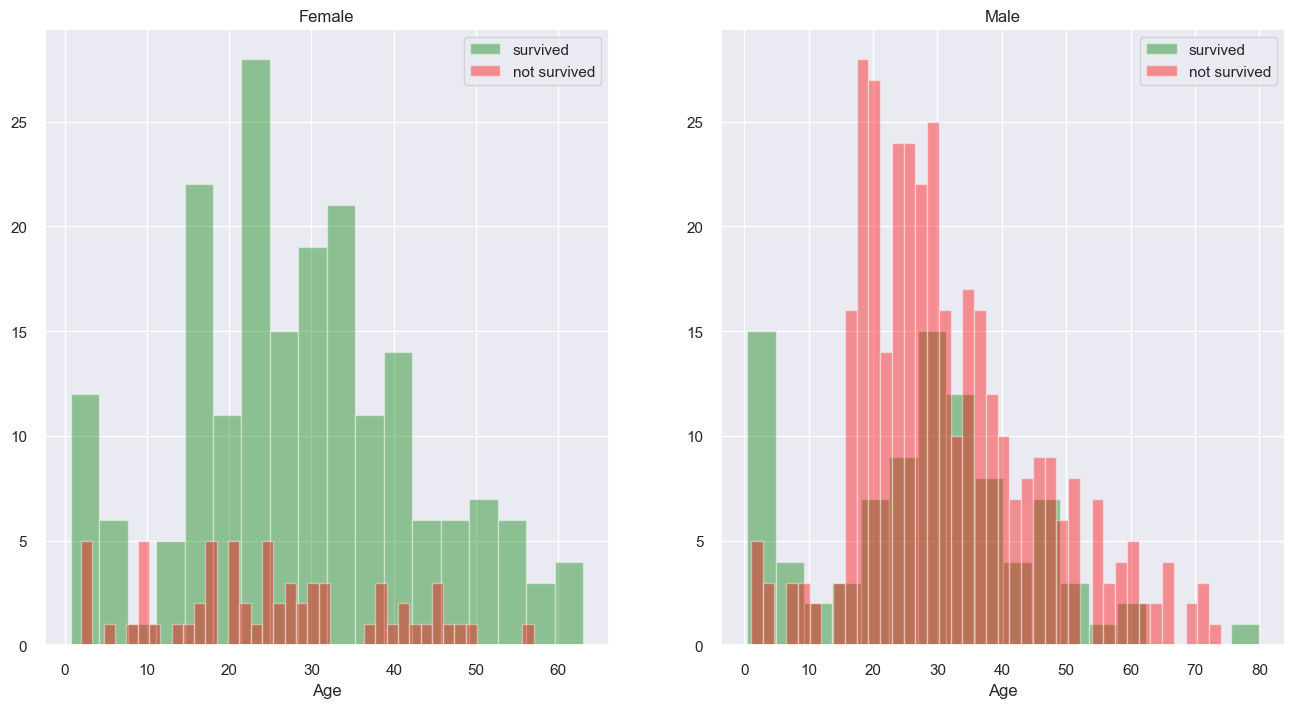

In [34]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

* ##### You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

* ##### For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

* ##### Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

#### Pclass

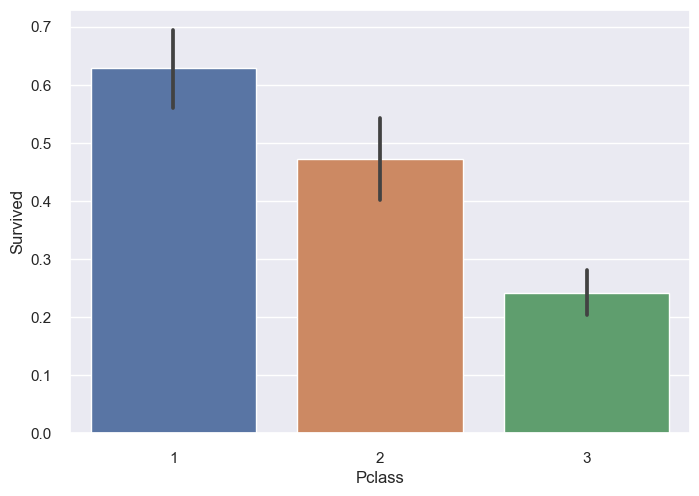

In [35]:
sns.barplot(x='Pclass', y='Survived', data=train_df);

##### Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

/home/sajid/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


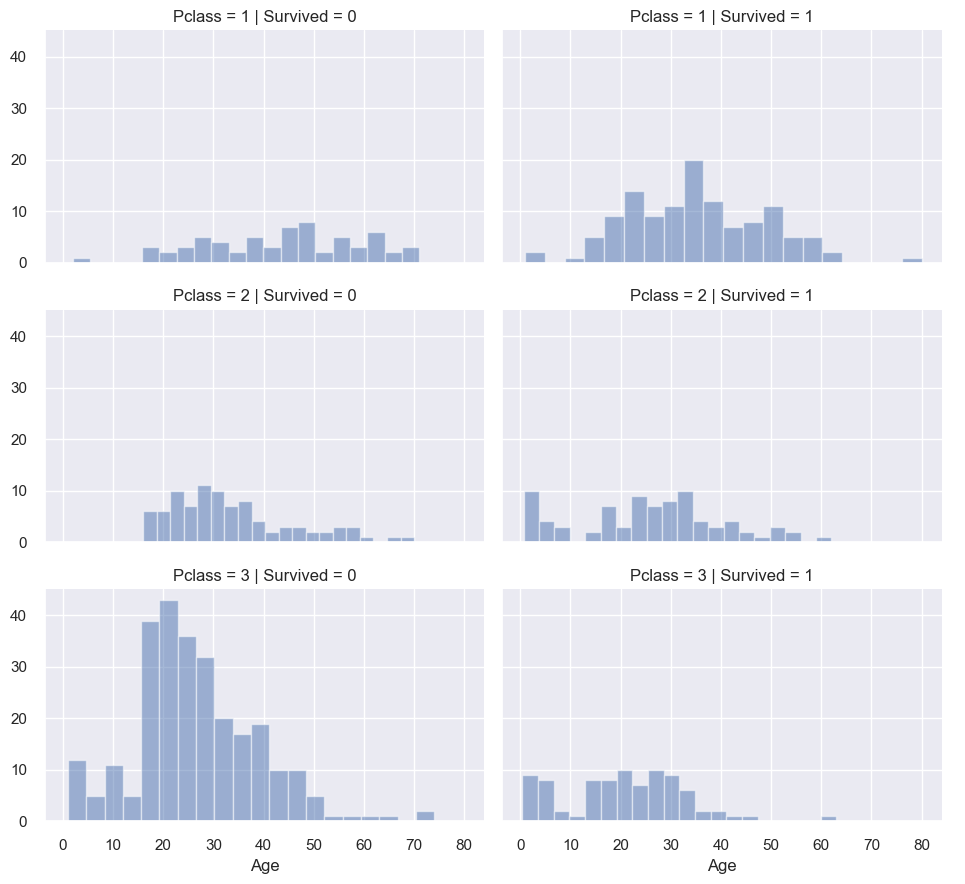

In [37]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

##### The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

#### `SibSp` and `Parch`

##### SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [38]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'
    #dataset['travelled_alone'] = dataset['travelled_alone'].astype(int)
train_df['travelled_alone'].value_counts()

travelled_alone
Yes    537
No     354
Name: count, dtype: int64

In [39]:
test_df['travelled_alone'].value_counts()

travelled_alone
Yes    253
No     165
Name: count, dtype: int64

In [40]:
train_df['relatives'].value_counts()

relatives
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

##### Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

### Data Preprocessing

In [49]:
# Drop 'PassengerId' from the train set, because it does not contribute to a persons survival probability.
train_df = train_df.drop(['PassengerId'], axis=1)

#### Missing Data

#### Cabin:
##### Cabin number looks like ‘C23’ and the letter refers to the deck. We will extract these and create a new feature, to represent a persons deck. 

In [50]:
train_df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [51]:
import re
deck = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna("U")
    #dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [52]:
train_df['Deck'].value_counts()

Deck
U    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64

In [54]:
train_df.groupby('Deck').mean('Deck')

,Survived,Pclass,Age,SibSp,Parch,Fare,relatives
Deck,,,,,,,
A,0.466667,1.000000,44.833333,0.133333,0.133333,39.623887,0.266667
B,0.744681,1.000000,34.955556,0.361702,0.574468,113.505764,0.936170
C,0.593220,1.000000,36.086667,0.644068,0.474576,100.151341,1.118644
D,0.757576,1.121212,39.032258,0.424242,0.303030,57.244576,0.727273
E,0.750000,1.312500,38.116667,0.312500,0.312500,46.026694,0.625000
F,0.615385,2.384615,19.954545,0.538462,0.538462,18.696792,1.076923
G,0.500000,3.000000,14.750000,0.500000,1.250000,13.581250,1.750000
U,0.299419,2.636628,27.588208,0.546512,0.364826,19.181079,0.911337


In [55]:
test_df['Deck'].value_counts()

Deck
U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64

#### Age:
##### Fill null values with random numbers, which are computed based on the mean age value in regards to the standard deviation.

In [56]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [57]:
train_df["Age"].isnull().sum()

0

In [58]:
test_df["Age"].isnull().sum()

0

In [59]:
train_df["Age"].describe()

count    891.000000
mean      29.491582
std       13.524621
min        0.000000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [60]:
#train_df.groupby('Age').mean()

#### Embarked:

In [61]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [62]:
train_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [63]:
#common_value = train_df['Embarked'].mode()
#common_value

In [64]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [65]:
test_df['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

### Converting Features

#### Fare: Convert from float to int

In [66]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [67]:
train_df['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [68]:
train_df['Fare'].isnull().sum()

0

In [69]:
test_df['Fare'].describe()

count    418.000000
mean      35.100478
std       55.872752
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [70]:
test_df['Fare'].isnull().sum()

0

In [71]:
train_df['Fare'] = train_df['Fare'].astype(int)

In [72]:
test_df['Fare'] = test_df['Fare'].astype(int)

#### Name: Extract titles from name and build a new feature from that

In [73]:
train_titles = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
type(train_titles)

pandas.core.series.Series

In [74]:
train_titles.value_counts()

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [75]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    #dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna("NA")
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [77]:
train_df.groupby(['Title']).mean('Title')

,Survived,Pclass,Age,SibSp,Parch,Fare,relatives
Title,,,,,,,
Master,0.575000,2.625000,7.350000,2.300000,1.375000,34.250000,3.675000
Miss,0.702703,2.291892,23.167568,0.702703,0.540541,43.340541,1.243243
Mr,0.156673,2.410058,31.568665,0.288201,0.152805,24.021277,0.441006
Mrs,0.793651,1.992063,34.531746,0.690476,0.825397,44.984127,1.515873
Rare,0.347826,1.347826,44.565217,0.347826,0.086957,36.782609,0.434783


In [79]:
test_df.groupby(['Title']).mean('Title')

,PassengerId,Pclass,Age,SibSp,Parch,Fare,relatives
Title,,,,,,,
Master,1123.380952,2.714286,28.095238,1.571429,1.380952,38.142857,2.952381
Miss,1100.240506,2.443038,28.835443,0.544304,0.392405,39.139241,0.936709
Mr,1101.279167,2.320833,28.725000,0.270833,0.175000,25.016667,0.445833
Mrs,1090.097222,1.833333,29.291667,0.597222,0.833333,59.611111,1.430556
Rare,1117.500000,1.333333,27.500000,0.500000,0.333333,80.500000,0.833333


#### Sex: Convert to numeric

In [80]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [81]:
'''
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

'''

'\ngenders = {"male": 0, "female": 1}\ndata = [train_df, test_df]\n\nfor dataset in data:\n    dataset[\'Sex\'] = dataset[\'Sex\'].map(genders)\n\n'

#### Ticket:

In [82]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [83]:
test_df['Ticket'].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

##### Since the Ticket attribute has too many unique values, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [84]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

#### Embarked: Convert to Numeric

In [85]:
'''
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
'''    

'\nports = {"S": 0, "C": 1, "Q": 2}\ndata = [train_df, test_df]\n\nfor dataset in data:\n    dataset[\'Embarked\'] = dataset[\'Embarked\'].map(ports)\n    \n'

### Create new features

#### Age times class

In [86]:

data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
    
    

#### Fare per Person:

In [87]:

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
    

### Creating categories:

#### Age: Convert from float to int and create a new feature "AgeGroup" using bins 

In [88]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7
    
    dataset['Age'] = dataset['Age'].astype(str)
    dataset.loc[ dataset['Age'] == '0', 'Age'] = "Children"
    dataset.loc[ dataset['Age'] == '1', 'Age'] = "Teens"
    dataset.loc[ dataset['Age'] == '2', 'Age'] = "Youngsters"
    dataset.loc[ dataset['Age'] == '3', 'Age'] = "Young Adults"
    dataset.loc[ dataset['Age'] == '4', 'Age'] = "Adults"
    dataset.loc[ dataset['Age'] == '5', 'Age'] = "Middle Age"
    dataset.loc[ dataset['Age'] == '6', 'Age'] = "Senior"
    dataset.loc[ dataset['Age'] == '7', 'Age'] = "Retired"

# let's see how it's distributed 
train_df['Age'].value_counts()

Age
Adults          161
Senior          156
Middle Age      147
Young Adults    138
Youngsters      119
Teens            95
Children         68
Retired           7
Name: count, dtype: int64

In [89]:
test_df['Age'].value_counts()

Age
Adults          82
Middle Age      71
Senior          65
Youngsters      60
Young Adults    60
Teens           45
Children        33
Retired          2
Name: count, dtype: int64

In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    int64 
 7   Embarked         891 non-null    object
 8   relatives        891 non-null    int64 
 9   travelled_alone  891 non-null    object
 10  Deck             891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Fare_Per_Person  891 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 97.6+ KB


#### Fare:

In [91]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset['Fare'] = dataset['Fare'].astype(str)
    dataset.loc[ dataset['Fare'] == '0', 'Fare'] = "Extremely Low"
    dataset.loc[ dataset['Fare'] == '1', 'Fare'] = "Very Low"
    dataset.loc[ dataset['Fare'] == '2', 'Fare'] = "Low"
    dataset.loc[ dataset['Fare'] == '3', 'Fare'] = "High"
    dataset.loc[ dataset['Fare'] == '4', 'Fare'] = "Very High"
    dataset.loc[ dataset['Fare'] == '5', 'Fare'] = "Extremely High"
    

In [92]:
train_df['Fare'].value_counts()

Fare
Extremely Low     241
Low               223
Very Low          216
High              158
Very High          44
Extremely High      9
Name: count, dtype: int64

In [93]:
test_df['Fare'].value_counts()

Fare
Extremely Low     120
Low               102
Very Low           96
High               69
Very High          23
Extremely High      8
Name: count, dtype: int64

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    object
 7   Embarked         891 non-null    object
 8   relatives        891 non-null    int64 
 9   travelled_alone  891 non-null    object
 10  Deck             891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Fare_Per_Person  891 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 97.6+ KB


In [95]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PassengerId      418 non-null    int64 
 1   Pclass           418 non-null    int64 
 2   Sex              418 non-null    object
 3   Age              418 non-null    object
 4   SibSp            418 non-null    int64 
 5   Parch            418 non-null    int64 
 6   Fare             418 non-null    object
 7   Embarked         418 non-null    object
 8   relatives        418 non-null    int64 
 9   travelled_alone  418 non-null    object
 10  Deck             418 non-null    object
 11  Title            418 non-null    object
 12  Age_Class        418 non-null    int64 
 13  Fare_Per_Person  418 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 45.8+ KB


In [96]:
# Let's take a last look at the training set
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,male,Youngsters,1,0,Extremely Low,S,1,No,U,Mr,66,3
1,1,1,female,Middle Age,1,0,High,C,1,No,C,Mrs,38,35
2,1,3,female,Young Adults,0,0,Extremely Low,S,0,Yes,U,Miss,78,7
3,1,1,female,Middle Age,1,0,High,S,1,No,C,Mrs,35,26
4,0,3,male,Middle Age,0,0,Very Low,S,0,Yes,U,Mr,105,8
5,0,3,male,Young Adults,0,0,Very Low,Q,0,Yes,U,Mr,78,8
6,0,1,male,Senior,0,0,High,S,0,Yes,E,Mr,54,51
7,0,3,male,Children,3,1,Low,S,4,No,U,Master,6,4
8,1,3,female,Young Adults,0,2,Very Low,S,2,No,U,Mrs,81,3
9,1,2,female,Teens,1,0,Low,C,1,No,U,Mrs,28,15


In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    object
 7   Embarked         891 non-null    object
 8   relatives        891 non-null    int64 
 9   travelled_alone  891 non-null    object
 10  Deck             891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Fare_Per_Person  891 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 97.6+ KB


In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PassengerId      418 non-null    int64 
 1   Pclass           418 non-null    int64 
 2   Sex              418 non-null    object
 3   Age              418 non-null    object
 4   SibSp            418 non-null    int64 
 5   Parch            418 non-null    int64 
 6   Fare             418 non-null    object
 7   Embarked         418 non-null    object
 8   relatives        418 non-null    int64 
 9   travelled_alone  418 non-null    object
 10  Deck             418 non-null    object
 11  Title            418 non-null    object
 12  Age_Class        418 non-null    int64 
 13  Fare_Per_Person  418 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 45.8+ KB


In [99]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [100]:
data = [train_df, test_df]

for dataset in data:
    dataset['Pclass'] = dataset['Pclass'].astype(str)
    dataset.loc[ dataset['Pclass'] == '1', 'Pclass'] = "Class1"
    dataset.loc[ dataset['Pclass'] == '2', 'Pclass'] = "Class2"
    dataset.loc[ dataset['Pclass'] == '3', 'Pclass'] = "Class3"
    

In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    object
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    object
 7   Embarked         891 non-null    object
 8   relatives        891 non-null    int64 
 9   travelled_alone  891 non-null    object
 10  Deck             891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Fare_Per_Person  891 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 97.6+ KB


In [102]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PassengerId      418 non-null    int64 
 1   Pclass           418 non-null    object
 2   Sex              418 non-null    object
 3   Age              418 non-null    object
 4   SibSp            418 non-null    int64 
 5   Parch            418 non-null    int64 
 6   Fare             418 non-null    object
 7   Embarked         418 non-null    object
 8   relatives        418 non-null    int64 
 9   travelled_alone  418 non-null    object
 10  Deck             418 non-null    object
 11  Title            418 non-null    object
 12  Age_Class        418 non-null    int64 
 13  Fare_Per_Person  418 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 45.8+ KB


In [103]:
train_df['Pclass'].value_counts()

Pclass
Class3    491
Class1    216
Class2    184
Name: count, dtype: int64

## Scaling the numerical data

In [104]:
# Capture all the numerical features so that we can scale them later
#data = [train_df, test_df]
train_numerical_features = list(train_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_numerical_features

['Survived', 'SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [105]:
type(train_numerical_features)

list

In [106]:
del train_numerical_features[0]
train_numerical_features

['SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [107]:
# Feature scaling - Standard scaler
ss_scaler = StandardScaler()
train_df_ss = pd.DataFrame(data = train_df)
train_df_ss[train_numerical_features] = ss_scaler.fit_transform(train_df_ss[train_numerical_features])

In [108]:
train_df_ss.shape

(891, 14)

In [109]:
train_df_ss.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,Class3,male,Youngsters,0.432793,-0.473674,Extremely Low,S,0.059160,No,U,Mr,0.044101,-0.459218
1,1,Class1,female,Middle Age,0.432793,-0.473674,High,C,0.059160,No,C,Mrs,-0.775127,0.434090
2,1,Class3,female,Young Adults,-0.474545,-0.473674,Extremely Low,S,-0.560975,Yes,U,Miss,0.395198,-0.347554
3,1,Class1,female,Middle Age,0.432793,-0.473674,High,S,0.059160,No,C,Mrs,-0.862902,0.182847
4,0,Class3,male,Middle Age,-0.474545,-0.473674,Very Low,S,-0.560975,Yes,U,Mr,1.185168,-0.319638


In [110]:
test_numerical_features = list(test_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_numerical_features

['PassengerId', 'SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [111]:
del test_numerical_features[0]
test_numerical_features

['SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [112]:
# Feature scaling - Standard scaler
test_ss_scaler = StandardScaler()
test_df_ss = pd.DataFrame(data = test_df)
test_df_ss[test_numerical_features] = test_ss_scaler.fit_transform(test_df_ss[test_numerical_features])

In [113]:
test_df.shape

(418, 14)

In [114]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title,Age_Class,Fare_Per_Person
0,892,Class3,male,Youngsters,0,0,Extremely Low,Q,0,Yes,U,Mr,66,7
1,893,Class3,female,Middle Age,1,0,Extremely Low,S,1,No,U,Mrs,114,3
2,894,Class2,male,Young Adults,0,0,Very Low,Q,0,Yes,U,Mr,52,9
3,895,Class3,male,Middle Age,0,0,Very Low,S,0,Yes,U,Mr,105,8
4,896,Class3,female,Middle Age,1,1,Very Low,S,2,No,U,Mrs,105,4


## One-hot encoding

In [115]:
# One-Hot encoding / Dummy variables
encode_col_list = list(train_df.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    train_df_ss = pd.concat([train_df_ss,pd.get_dummies(train_df_ss[i], prefix=i)],axis=1)
    train_df_ss.drop(i, axis = 1, inplace=True)

In [116]:
train_df_ss.shape

(891, 43)

In [117]:
train_df_ss.head()

,Survived,SibSp,Parch,relatives,Age_Class,Fare_Per_Person,Pclass_Class1,Pclass_Class2,Pclass_Class3,Sex_female,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0.432793,-0.473674,0.059160,0.044101,-0.459218,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
1,1,0.432793,-0.473674,0.059160,-0.775127,0.434090,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1,-0.474545,-0.473674,-0.560975,0.395198,-0.347554,False,False,True,True,...,False,False,False,False,True,False,True,False,False,False
3,1,0.432793,-0.473674,0.059160,-0.862902,0.182847,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0,-0.474545,-0.473674,-0.560975,1.185168,-0.319638,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False


In [118]:
# One-Hot encoding / Dummy variables
test_encode_col_list = list(test_df.select_dtypes(include=['object']).columns)
for i in test_encode_col_list:
    test_df_ss = pd.concat([test_df_ss,pd.get_dummies(test_df_ss[i], prefix=i)],axis=1)
    test_df_ss.drop(i, axis = 1, inplace=True)

In [119]:
test_df_ss.shape

(418, 43)

In [120]:
test_df_ss.head()

,PassengerId,SibSp,Parch,relatives,Age_Class,Fare_Per_Person,Pclass_Class1,Pclass_Class2,Pclass_Class3,Sex_female,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,-0.499470,-0.400248,-0.553443,0.006823,-0.401204,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
1,893,0.616992,-0.400248,0.105643,1.197300,-0.513662,False,False,True,True,...,False,False,False,False,True,False,False,False,True,False
2,894,-0.499470,-0.400248,-0.553443,-0.340399,-0.344975,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
3,895,-0.499470,-0.400248,-0.553443,0.974085,-0.373089,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
4,896,0.616992,0.619896,0.764728,0.974085,-0.485547,False,False,True,True,...,False,False,False,False,True,False,False,False,True,False


## ML Modelling

In [121]:
X_train = train_df_ss.drop("Survived", axis=1)
Y_train = train_df_ss["Survived"]
X_test  = test_df_ss.drop("PassengerId", axis=1).copy()

In [122]:
X_train.shape

(891, 42)

In [123]:
Y_train.shape

(891,)

In [124]:
X_test.shape

(418, 42)

In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SibSp                891 non-null    float64
 1   Parch                891 non-null    float64
 2   relatives            891 non-null    float64
 3   Age_Class            891 non-null    float64
 4   Fare_Per_Person      891 non-null    float64
 5   Pclass_Class1        891 non-null    bool   
 6   Pclass_Class2        891 non-null    bool   
 7   Pclass_Class3        891 non-null    bool   
 8   Sex_female           891 non-null    bool   
 9   Sex_male             891 non-null    bool   
 10  Age_Adults           891 non-null    bool   
 11  Age_Children         891 non-null    bool   
 12  Age_Middle Age       891 non-null    bool   
 13  Age_Retired          891 non-null    bool   
 14  Age_Senior           891 non-null    bool   
 15  Age_Teens            891 non-null    boo

## Logistic Regression

In [127]:
# Instantiate our model
logreg = LogisticRegression()

# Fit our model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test data
logreg_predictions = logreg.predict(X_test)

logreg_data = pd.read_csv('Dataset/test.csv')
logreg_data.insert((logreg_data.shape[1]),'Survived',logreg_predictions)

logreg_data.to_csv('LogisticRegression_SS_OH_FE2.csv')

## Adaptive Boosting

In [128]:
# Instantiate our model
adaboost = AdaBoostClassifier()

# Fit our model to the training data
adaboost.fit(X_train, Y_train)

# Predict on the test data
adaboost_predictions = adaboost.predict(X_test)

adaboost_data = pd.read_csv('Dataset/test.csv')
adaboost_data.insert((adaboost_data.shape[1]),'Survived',adaboost_predictions)

adaboost_data.to_csv('AdaptiveBoosting_SS_OH_FE.csv')

## Bagging Classifier

In [129]:
# Instantiate our model
bag = BaggingClassifier()

# Fit our model to the training data
bag.fit(X_train, Y_train)

# Predict on the test data
bag_predictions = bag.predict(X_test)

bag_data = pd.read_csv('Dataset/test.csv')
bag_data.insert((bag_data.shape[1]),'Survived',bag_predictions)

bag_data.to_csv('Bagging.csv')

## Random Forest

In [130]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

random_forest_predictions = random_forest.predict(X_test)

rf_data = pd.read_csv('Dataset/test.csv')
rf_data.insert((rf_data.shape[1]),'Survived',random_forest_predictions)

rf_data.to_csv('RandomForest_SS_OH.csv')

## Decision Trees

In [131]:
# Instantiate our model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

dt_predictions = dt.predict(X_test)

dt_data = pd.read_csv('Dataset/test.csv')
dt_data.insert((dt_data.shape[1]),'Survived',dt_predictions)

dt_data.to_csv('DecisionTrees.csv')

## Gradient Boost

In [132]:
# Instantiate our model
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

gb_predictions = gb.predict(X_test)

gb_data = pd.read_csv('Dataset/test.csv')
gb_data.insert((gb_data.shape[1]),'Survived',gb_predictions)

gb_data.to_csv('GradientBoost_SS_OH_FE.csv')

## XGBoost

In [133]:
# Instantiate our model
xg = XGBClassifier(learning_rate=0.02, n_estimators=750,
                   max_depth= 3, min_child_weight= 1, 
                   colsample_bytree= 0.6, gamma= 0.0, 
                   reg_alpha= 0.001, subsample= 0.8
                  )
xg.fit(X_train, Y_train)

xg_predictions = xg.predict(X_test)

xg_data = pd.read_csv('Dataset/test.csv')
xg_data.insert((xg_data.shape[1]),'Survived',xg_predictions)

xg_data.to_csv('XGBoost_SS_OH_FE_GSCV.csv')

### Hyperparameter tuning - using GridSearchCV to find the best set of parameters

In [138]:

param_test1 = {
    #'n_estimators': [100,200,500,750,1000],
    #'max_depth': [3,5,7,9],
    #'min_child_weight': [1,3,5],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1]
    #'learning_rate': [0.01, 0.02, 0.05, 0.1]
}

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

'''
fit_params={"early_stopping_rounds":42, 
            "eval_metric" : "mae", 
            "eval_set" : [[test_features, test_labels]]}
            
'''

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.02, n_estimators=750,
                   max_depth= 3, min_child_weight= 1), 
                       param_grid = param_test1, #fit_params=fit_params,
                       scoring=scoring, cv=3, verbose = 5, refit='Accuracy')
gsearch1.fit(X_train, Y_train)


Fitting 3 folds for each of 560 candidates, totalling 1680 fits


[CV 1/3] END colsample_bytree=0.6, gamma=0.0, reg_alpha=0, subsample=0.6; AUC: (test=0.826) Accuracy: (test=0.798) total time=   9.7s
[CV 2/3] END colsample_bytree=0.6, gamma=0.0, reg_alpha=0, subsample=0.6; AUC: (test=0.885) Accuracy: (test=0.855) total time=   2.1s
[CV 3/3] END colsample_bytree=0.6, gamma=0.0, reg_alpha=0, subsample=0.6; AUC: (test=0.888) Accuracy: (test=0.832) total time=   2.2s
[CV 1/3] END colsample_bytree=0.6, gamma=0.0, reg_alpha=0, subsample=0.7; AUC: (test=0.823) Accuracy: (test=0.798) total time=   1.9s
[CV 2/3] END colsample_bytree=0.6, gamma=0.0, reg_alpha=0, subsample=0.7; AUC: (test=0.885) Accuracy: (test=0.852) total time=   1.9s
[CV 3/3] END colsample_bytree=0.6, gamma=0.0, reg_alpha=0, subsample=0.7; AUC: (test=0.888) Accuracy: (test=0.835) total time=   2.0s
[CV 1/3] END colsample_bytree=0.6, gamma=0.0, reg_alpha=0, subsample=0.8; AUC: (test=0.826) Accuracy: (test=0.801) total time=   1.8s
[CV 2/3] END colsample_bytree=0.6, gamma=0.0, reg_alpha=0, sub

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.02,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=750, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             refit='Accuracy',
             scoring={'AUC': 'roc_auc',
                      'Accuracy': make_scorer(accuracy_score)},
             verbose=5)

In [139]:
#gsearch1.grid_scores_, 
gsearch1.best_params_, gsearch1.best_score_

({'colsample_bytree': 0.7, 'gamma': 0.0, 'reg_alpha': 0.005, 'subsample': 0.9},
 0.8372615039281706)

In [140]:
results = gsearch1.cv_results_

In [ ]:
results

C:\Users\porvakan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\porvakan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\porvakan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_a

{'mean_fit_time': array([0.50171216, 0.48533201, 0.44432712, 0.43032408, 0.52132289,
        0.50332848, 0.49100502, 0.42567857, 0.47033389, 0.51866531,
        0.4810005 , 0.43034784, 0.49627948, 0.53554138, 0.52671417,
        0.56016843, 0.53707266, 0.54496495, 0.46766321, 0.69413503,
        1.0046157 , 0.89752666, 0.58700053, 0.4650054 , 0.73066799,
        0.61600272, 0.70261327, 0.58838892, 0.582244  , 0.60976156,
        0.5636394 , 0.53266454, 0.60933582, 0.58867017, 0.55732902,
        0.46900511, 0.54167287, 0.51334159, 0.45300921, 0.43101072,
        0.48300123, 0.47600142, 0.45100602, 0.44966857, 0.48200782,
        0.56237817, 0.45967484, 0.46334751, 0.49396261, 0.54905574,
        0.50133999, 0.48633798, 0.48632852, 0.51699956, 0.58482448,
        0.53633714, 0.48900795, 0.48967687, 0.51033711, 0.53226527,
        0.49367023, 0.55166936, 0.67533644, 0.44101   , 0.5443422 ,
        0.48352631, 0.46533593, 0.47167031, 0.47233534, 0.46934215,
        0.45400675, 0.45467122,

In [141]:
gsearch1.best_score_

0.8372615039281706